Things tested in this NB:
- Reading images and displaying 
- converting image to greyscale
- Negative of img
- rotating and resizing an image
- splitting of an image
- extracting bgr values of a single pixel
- Gamma Transform
- log transform
- histogram equilization

In [1]:
#import os
#import numpy
#os.path.abspath(numpy.__file__)

In [2]:
#!pip3 install opencv

In [3]:
#os.sys.path.append("C:\\Users\\Aditi\\Anaconda3\\Library\\bin")
#os.sys.path

In [4]:
import cv2 as c
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img = c.imread('images/robins.jpg',1)
"""
flag:
1 - colour img or c.IMREAD_UNCHANGED
0 - greyscale or c.IMREAD_GRAYSCALE
-1 - unchanged/original or c.IMREAD_COLOR
"""
print(img.shape)
print(img.dtype)
c.imshow('Robins',img)
c.waitKey(0)
c.destroyAllWindows()

(484, 860, 3)
uint8


In [6]:
#changing colour image to grey without importing new one
grey = c.cvtColor(img, c.COLOR_BGR2GRAY)
c.imshow('Robins grey',grey)
c.waitKey(0)
c.destroyAllWindows()

In [7]:
#rotating an image
r_image = c.rotate(img, c.ROTATE_90_CLOCKWISE)
c.imshow('Rotated 90 clockwise',r_image)
c.waitKey(0)
c.destroyAllWindows()

In [8]:
#negative of image

new_zeros = np.zeros(img.shape, np.uint8)
new_white = np.ones(img.shape, np.uint8) * 255

neg = new_zeros - img
neg2 = new_white - img


neg1 = 255-img
    
img_and_neg = np.hstack((img, neg))
img_and_neg1 = np.hstack((img, neg1))
img_and_neg2 = np.hstack((img, neg2))

#both give same result
c.imshow("Image and it's negative",img_and_neg) #has some noise
c.imshow("Image and it's negative1",img_and_neg1)
c.imshow("Image and it's negative2",img_and_neg2)
c.waitKey(0)
c.destroyAllWindows()

In [9]:
#resizing an image
img_resized = c.resize(img,(244, 244))
c.imshow('Rotated 90 clockwise',img_resized)
c.waitKey(0)
c.destroyAllWindows()

In [10]:
#splitting an image
b,g,r = c.split(img)
zeros = np.zeros(b.shape, np.uint8) #black image of same size
white = np.ones(b.shape, np.uint8)*255 #white image of same size

#images merged with black
r1 = c.merge((zeros, zeros, r))
g1 = c.merge((zeros, g, zeros))
b1 = c.merge((b, zeros, zeros))

#images merged with white - takes the negative of an image
r2 = c.merge((white, white, r))
g2 = c.merge((white, g, white))
b2 = c.merge((b, white, white))

#showing output
red = np.hstack((r1,r2))
green = np.hstack((g1,g2))
blue = np.hstack((b1,b2))

c.imshow('RED',red)
c.imshow('GREEN',green)
c.imshow('BLUE',blue)
c.waitKey(0)
c.destroyAllWindows()

In [11]:
#extracting BGR values of a pixel
bl,gr,re = img[100,100]
print(bl,gr,re)
print(img.shape) #dimensions of image
print(img.size) #total number of pixels

98 113 131
(484, 860, 3)
1248720


In [12]:
#Gamma transform/Correction:  s = c*r^gamma

"""
Gamma values: >1 : will darken the image
              <1 : will brighten the image
              ==1: will leave image unchanged
See graph
"""

for gamma in [0.5, 1, 1.5]:
    g = np.array(255*(img/255)**gamma, dtype = 'uint8')
    c.imshow("gamma: {}".format(gamma), g)
    c.waitKey(0)
c.destroyAllWindows()

In [13]:
#log transform:  s = c*log(1+r)
#brighten the image;
#a type of grey level transform

np.seterr(divide = 'ignore')  #ignore divide by zero error

const = 255/(np.log(1+np.max(grey)))
log = np.array(const* np.log(1+grey), dtype = 'uint8')

g_img_and_log = np.hstack((grey, log))
c.imshow("Log transform",g_img_and_log)
c.waitKey(0)
c.destroyAllWindows()

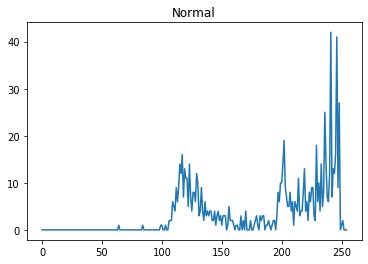

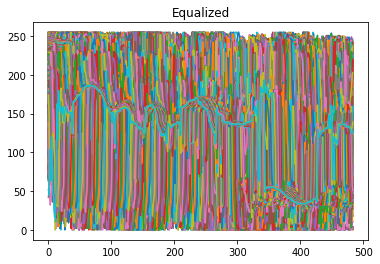

In [14]:
#Histogram equalization
#grey = c.imread('C:/Users/Aditi/Documents/Manipal/3rd year/FCV-ComputerVision/pics/robins.jpg',0)

#cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
h1 = c.calcHist(grey, [0],None,[255],[0,255])
plt.plot(h1)
plt.title('Normal')
plt.show()

#equalization using function
eq1 = c.equalizeHist(grey)
plt.plot(eq1)
plt.title('Equalized')
plt.show()

img_and_eq1 = np.hstack((grey, eq1))
c.imshow('Equalization: ', img_and_eq1)
c.waitKey(0)
c.destroyAllWindows()